Predicción de la resistencia del concreto usando redes neuronales --- 17:34 min
===

* 17:34 min | Ultima modificación: Abril 14, 2021 | [YouTube](https://youtu.be/1YNdh1fElwg)

El concreto es uno de los materiales más usados en construcción. Es fabricado por la mezcla de varios elementos, la cual, al secarse, forma una masa dura muy resistente a la compresión. Uno de los principales problemas es que la mezcla puede demorarse varios meses en secar, y resulta particularmente importante el poder realizar pronósticos de la resistencia que alcanzará, tanto para fines de control como para verificar las restricciones de diseño.  En esta lección se desarrolla un modelo de pronóstico de la resistencia usando perceptrones multicapa en scikit-learn.

## Descripción del problema

La muestra contiene 1030 mediciones de concretos con ocho características que decriben los componentes usados en la mezcla. Se piensa que estas ocho características tienen una relación no lineal con la resistencia a la compresión final que tiene el concreto. El problema consiste en construir un modelo de regresión no lineal que permita pronósticar la resistencia del concreto con base en ellas. 

* Cement (component 1) [Cemento] -- quantitative -- kg in a m3 mixture -- Input Variable 


* Bla st Furnace Slag [Ceniza] (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable 


* Fly Ash (component 3) [Ceniza] -- quantitative -- kg in a m3 mixture -- Input Variable 


* Water (component 4) [Agua] -- quantitative -- kg in a m3 mixture -- Input Variable 


* Superplasticizer (component 5) [Plastificador] -- quantitative -- kg in a m3 mixture -- Input Variable 


* Coarse Aggregate (component 6) [Agregado grueso] -- quantitative -- kg in a m3 mixture -- Input Variable 


* Fine Aggregate (component 7) [Agregado fino] -- quantitative -- kg in a m3 mixture -- Input Variable 


* Age -- quantitative -- Day (1~365) [Edad] -- Input Variable 


* Concrete compressive strength [Resistencia a la compresión] -- quantitative -- MPa -- Output Variable 

## Lectura de datos

In [2]:
import pandas as pd


df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/concrete.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
#
# Todas las columnas son numéricas
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Análisis Exploratorio

In [4]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


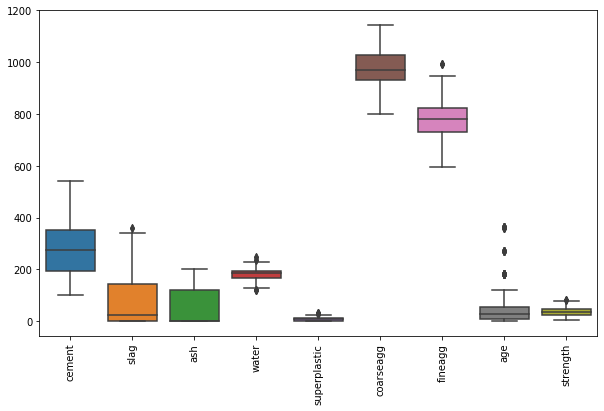

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#
# Los rangos de las variables numéricas son
# bastantes diferentes
#
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90);

In [6]:
#
# Información relevante de la resistencia
# 
df.strength.describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

In [7]:
from sklearn.preprocessing import MinMaxScaler

#
#  Se escalan todas las variables al rango [0, 1]
#  para evitar problemas asociados a la escala
#
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_norm.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


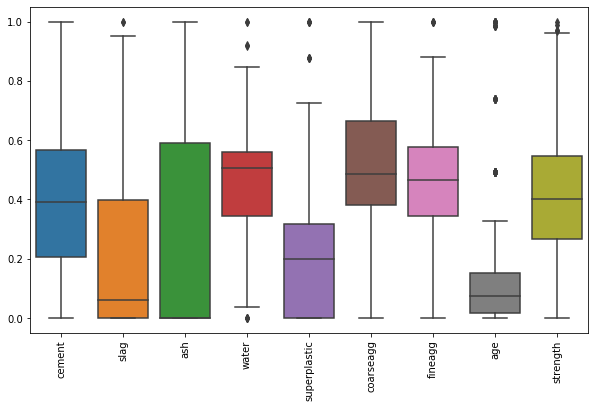

In [8]:
#
# Efecto del escalamiento de las variables
#
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_norm)
plt.xticks(rotation=90);

## Desarrollo y evaluación del modelo

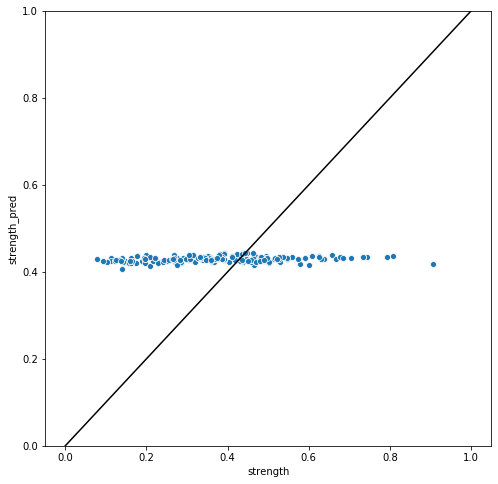

In [9]:
#
# Crea el modelo con una capa oculta
#

from sklearn.neural_network import MLPRegressor

m = MLPRegressor(
    hidden_layer_sizes=(2,),
    activation="logistic",
    learning_rate="adaptive",
    momentum=0.9,
    learning_rate_init=0.01,
    max_iter=1000,
)

#
# Se usa el 75% de los datos para entrenamiento
# concrete_train <- concrete_norm[1:773, ]
# concrete_test <- concrete_norm[774:1030, ]
#
m.fit(df_norm.drop(columns="strength")[0:772], df_norm.strength[0:772])

#
# Pronostico
#
df_norm["strength_pred"] = m.predict(df_norm.drop(columns="strength"))

#
# Pronóstico para el conjunto de prueba
#
plt.figure(figsize=(8, 8))
sns.scatterplot(x="strength", y="strength_pred", data=df_norm[772:1030])
plt.plot([0, 1], [0, 1], color="black")
plt.ylim(0, 1);

**Ejercicio.---** Realice la estimación de los modelos usando cross-validation.

**Ejercicio.---** Cómo se puede determinar el número óptimo de las neuronas de la capa oculta?

**Ejercicio.---** Este es un problema de optimización no lineal complejo con múltiples mínimos locales. Cómo debería realizarse la optimización del modelo?